# Model building

Authors: Aditya Khatode, Tejas Gosavi, Saloni Deshmukh, Sakshi Ambre.
Date: 22/12/2022.

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
tf.get_logger().setLevel("ERROR")

# Important constants.
IMAGE_SIZE = 256
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 100

In [2]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\Aditya\Desktop\BEProject\Implementation\Brain_tumour\dataset\clean_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE),
)

Found 2002 files belonging to 2 classes.


In [3]:
len(dataset)

251

In [4]:
train_size = 0.8
print(f"The training dataset should be {int(len(dataset)*train_size)} batches")

The training dataset should be 200 batches


In [5]:
# Takes first 300 batches of the dataset
train_ds = dataset.take(300)
len(train_ds)

251

In [6]:
# Remaining data after the training chunk.
remnant = dataset.skip(300)
len(remnant)

0

In [7]:
val_size = 0.1
print(f"The validation dataset should be {int(len(dataset)*val_size)} batches")

The validation dataset should be 25 batches


In [8]:
# Takes the first 37 batch of the remaining data.
val_ds = remnant.take(37)
len(val_ds)

0

In [9]:
# Takes all the data after the first 37 batches.
test_ds = remnant.skip(37)
len(test_ds)

0

In [10]:
def chunking(dataset, train_split=0.8, validation_split=0.1, test_split=0.1, shuffle=True, buffer=1000):
    
    number_of_batches = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(buffer, seed=321)
    
    train_size = int(train_split*number_of_batches)
    validation_size = int(validation_split*number_of_batches)
    
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(validation_size)
    test_ds = dataset.skip(train_size).skip(validation_size)
    
    return train_ds, val_ds, test_ds

In [11]:
train_ds, val_ds, test_ds = chunking(dataset)
print(f"""The dataset of 94 batches was chunked as follows: 
{len(train_ds)} batches for the Training dataset, 
{len(val_ds)} batches for the Validation dataset and, 
{len(test_ds)} batches for the Testing dataset.""")

The dataset of 94 batches was chunked as follows: 
200 batches for the Training dataset, 
25 batches for the Validation dataset and, 
26 batches for the Testing dataset.


In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
# Layers for data_augmentation, resizing and rescaling.
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.5),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.4)
])

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu", ),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

# Initialises the model.
model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (8, 256, 256, 3)          0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [16]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/100
200/200 [==============================] - 337s 1s/step - loss: 0.6920 - accuracy: 0.5157 - val_loss: 0.6863 - val_accuracy: 0.5250
Epoch 2/100
200/200 [==============================] - 233s 1s/step - loss: 0.6747 - accuracy: 0.5734 - val_loss: 0.6429 - val_accuracy: 0.6000
Epoch 3/100
200/200 [==============================] - 220s 1s/step - loss: 0.6600 - accuracy: 0.6205 - val_loss: 0.5966 - val_accuracy: 0.6650
Epoch 4/100
200/200 [==============================] - 217s 1s/step - loss: 0.6468 - accuracy: 0.6393 - val_loss: 0.5579 - val_accuracy: 0.7450
Epoch 5/100
200/200 [==============================] - 216s 1s/step - loss: 0.6227 - accuracy: 0.6769 - val_loss: 0.5152 - val_accuracy: 0.7750
Epoch 6/100
200/200 [==============================] - 208s 1s/step - loss: 0.5923 - accuracy: 0.6926 - val_loss: 0.5233 - val_accuracy: 0.7550
Epoch 7/100
200/200 [==============================] - 236s 1s/step - loss: 0.5630 - accuracy: 0.7183 - val_loss: 0.4638 - val_accuracy:

In [18]:
scores = model.evaluate(test_ds)

26/26 [==============================] - 23s 284ms/step - loss: 0.0951 - accuracy: 0.9615


In [19]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 200}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
print(len(history.history['accuracy']))
print(history.history['accuracy'])

100
[0.5156838297843933, 0.5734002590179443, 0.6204516887664795, 0.6392722725868225, 0.6769134402275085, 0.6925972104072571, 0.7183187007904053, 0.7114177942276001, 0.7471768856048584, 0.7747804522514343, 0.7628607153892517, 0.7867001295089722, 0.8067753911018372, 0.816185712814331, 0.8199498057365417, 0.8212045431137085, 0.8350062966346741, 0.8475533127784729, 0.8488080501556396, 0.8682559728622437, 0.8425344824790955, 0.8695106506347656, 0.8657465577125549, 0.8826850652694702, 0.8789209723472595, 0.8764115571975708, 0.8858218193054199, 0.8889585733413696, 0.8877038955688477, 0.8833124041557312, 0.8870765566825867, 0.8851944804191589, 0.8964868187904358, 0.8864491581916809, 0.8939774036407471, 0.9021329879760742, 0.9140527248382568, 0.8983688950538635, 0.904015064239502, 0.9027603268623352, 0.9102885723114014, 0.923462986946106, 0.9021329879760742, 0.904015064239502, 0.9052697420120239, 0.9102885723114014, 0.9127979874610901, 0.9096612334251404, 0.9178168177604675, 0.9115433096885681,

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

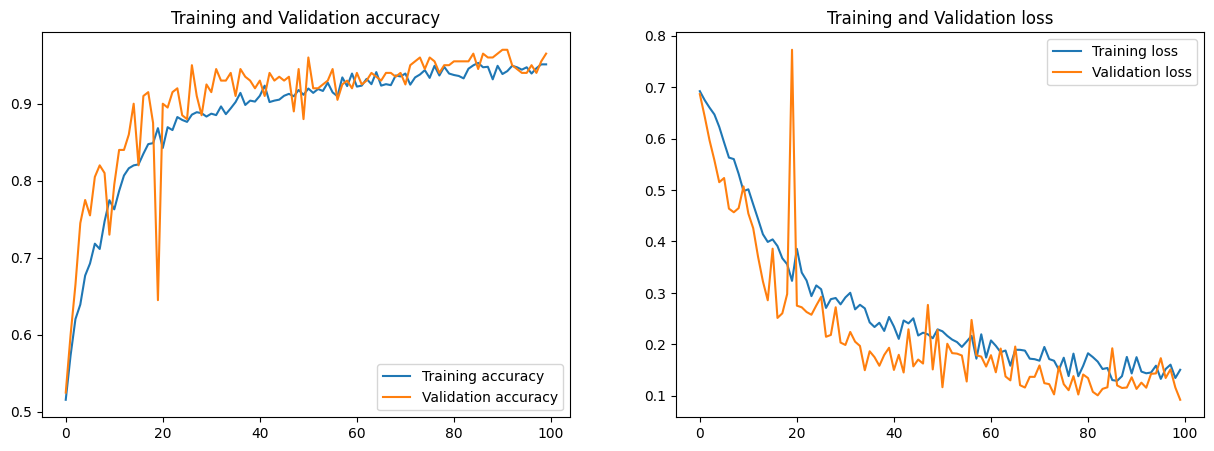

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label="Training accuracy")
plt.plot(range(EPOCHS), val_accuracy, label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label="Training loss")
plt.plot(range(EPOCHS), val_loss, label="Validation loss")
plt.legend(loc="upper right")
plt.title("Training and Validation loss")

plt.show()

Predicting this image...
Actual label: tumour
1/1 [==============================] - 8s 8s/step
predicted label: tumour


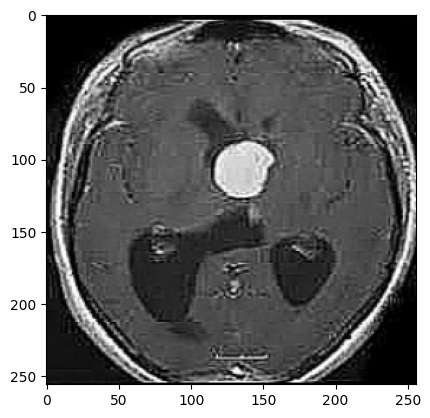

In [25]:
import numpy as np

# Gets the label names from the dataset object.
label_names = dataset.class_names

for images_batch, labels_batch in test_ds.take(1):
    image = images_batch[0].numpy().astype("uint8")
    label = labels_batch[0].numpy()
    
    print("Predicting this image...")
    plt.imshow(image)
    print(f"Actual label: {label_names[label]}")
    
    # Binary classification: less than 0.5 is [0] and greater than 0.5 is [1]
    predictions = (model.predict(images_batch) > 0.5).astype("int32")
    print(f"predicted label: {label_names[predictions[0][0]]}")

In [26]:
def classify(model, img):
    
    image_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    
    # Create a batch.
    image_array = tf.expand_dims(image_array, 0)
    
    # Get prediction.
    prediction = (model.predict(image_array) > 0.5).astype("int32")
    
    # Get label name
    predicted_label = label_names[prediction[0][0]]
    return predicted_label

1/1 [==============================] - 0s 167ms/step


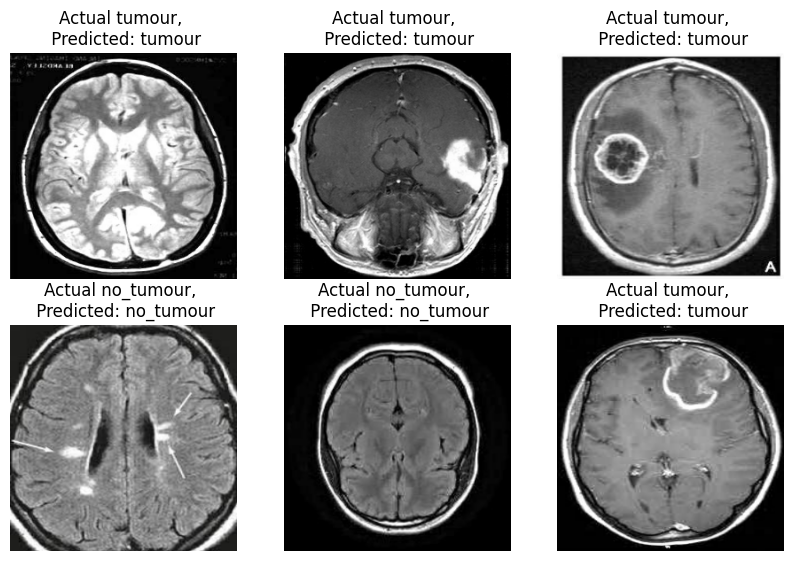

In [27]:
# Expand plot size.
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_label = classify(model, images[i].numpy())
        actual_label = label_names[labels[i]]
        
        plt.title(f"Actual {actual_label}, \n Predicted: {predicted_label}")
        plt.axis("off")

In [28]:
model_version = "binary_model"
model.save(f"C:/Users/Aditya/Desktop/BEProject/Implementation/Brain_tumour/saved_models2/{model_version}")